In [64]:
import numpy as np

X = 2 * np.random.rand(1000, 1)


y = 4 + 3 * X + np.random.randn(1000, 1)


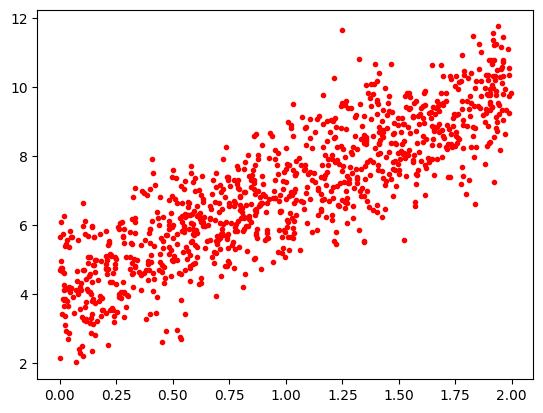

In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.show()

In [68]:
np.ones((10,1))



array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [18]:
X_b = np.c_[np.ones((1000,1)),X]
X_b[:10]

array([[1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ]])

In [19]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.168034  ],
       [2.92906282]])

In [20]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [21]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.168034  ],
       [10.02615964]])

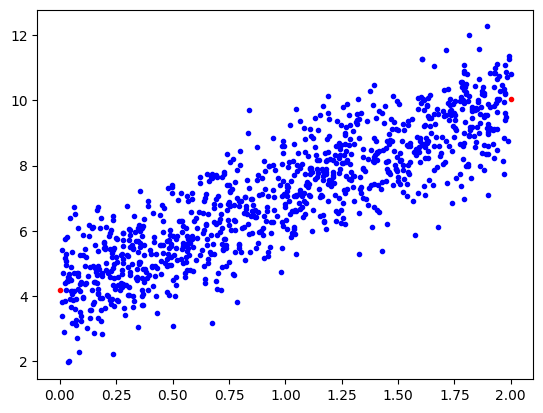

In [22]:
plt.plot(X_new,y_predict,"r.")
plt.plot(X,y,"b.")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.168034]), array([[2.92906282]]))

# Linear regression using gradient descent

In [70]:
theta = np.random.randn(2,1)
theta

# np.random.rand(2, 1)

array([[0.95838582],
       [0.05166098]])

In [71]:
np.random.rand(2, 1)

array([[0.1962943 ],
       [0.02256451]])

In [25]:
import numpy as np

X = 2 * np.random.rand(1000, 1)

y = 4 + 3 * X + np.random.randn(1000, 1)

X_b = np.c_[np.ones((1000,1)),X]


In [26]:
n_iterations = 1000

m = 1000
eta = 0.1
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

theta

array([[4.02143763],
       [2.98180214]])

In [72]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

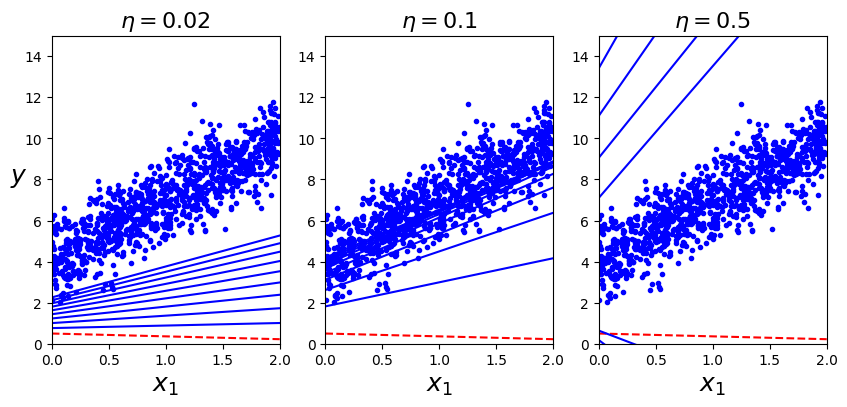

In [79]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# stochastic gradient descend

In [62]:
# 1. learning rate changing
# 2. pick up one sample instead of using all samples to decide jumping direction

m = len(X_b)
m

1000

In [63]:
np.random.seed(42)
random_index = np.random.randint(m) 
random_index

102

In [64]:
xi = X_b[random_index]
xi

array([1.        , 1.66864959])

In [65]:
xi = X_b[random_index:random_index+1]
xi.T

array([[1.        ],
       [1.66864959]])

In [80]:
m = len(X_b) 
np.random.seed(42)

n_epochs = 1000

t0,t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch)
    theta = theta - eta*gradients

    
theta

array([[ 6.96715734],
       [-0.03808479]])

In [82]:
y[:10].ravel()

array([3.54924776, 9.54344808, 7.08977695, 9.23110455, 8.37852708,
       7.02253327, 6.10886272, 7.2337007 , 6.76013064, 6.3729552 ])

In [84]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,
                       penalty= None,eta0=0.1, random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16633175]), array([3.06831375]))

# min_batch gradient descent

In [68]:
import numpy as np

X = 2 * np.random.rand(1000, 1)

y = 4 + 3 * X + np.random.randn(1000, 1)

X_b = np.c_[np.ones((1000,1)),X]

In [85]:
shuffled_indices = np.random.permutation(100)
shuffled_indices

array([18, 50, 96, 61, 21, 48, 92, 32, 46, 43, 95, 54, 91, 85, 16, 13, 77,
       19, 83, 87, 42,  8, 60, 30, 65, 37, 97, 24,  9, 38, 98, 93, 44, 88,
       72, 62, 63, 26, 69, 84, 71, 36, 73, 10,  3,  0,  5, 20, 35, 47, 58,
       34, 68, 78, 70, 99, 55, 41, 67, 49, 45, 94, 40, 66, 51, 90, 86, 14,
       31, 59, 39, 22, 15, 89,  6, 80, 81, 76, 27, 74,  1, 75, 57,  2, 28,
       82, 12, 53, 29, 25,  4, 56, 17,  7, 52, 33, 23, 11, 64, 79])

In [69]:
m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2,1)

theta_path_mgd = []

n_epochs = 50

t0,t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

minibatch_size = 200
t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mgd.append(theta)

#theta_path_mgd
theta_path_mgd = np.array(theta_path_mgd)

In [70]:
m = len(X_b)
np.random.seed(42)

theta_path_sgd = []

n_epochs = 10000

t0,t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch)
    theta = theta - eta*gradients
    theta_path_sgd.append(theta)

    
theta_path_sgd = np.array(theta_path_sgd)

In [71]:
n_iterations = 1000

theta_path_bgd = []

m = 1000
eta = 0.1
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    theta_path_bgd.append(theta)


theta_path_bgd = np.array(theta_path_bgd)

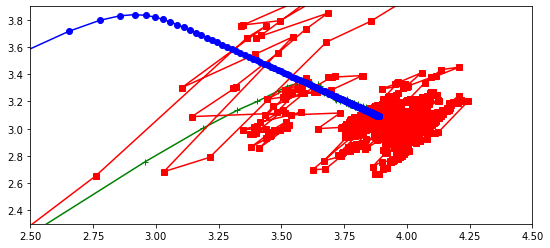

In [72]:
plt.figure(figsize=(9,4))
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+")
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o")

plt.axis([2.5,4.5,2.3,3.9])
plt.show()

# Ploynomial Regression

In [86]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m =5
np.random.randn(m,1)

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854],
       [ 1.52302986],
       [-0.23415337]])

In [87]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

# np.random.rand(m,1) , 标准正态分布是以0为均数、以1为标准差的正态分布，记为N（0，1）,
# 当函数括号内有两个及以上参数时，则返回对应维度的数组

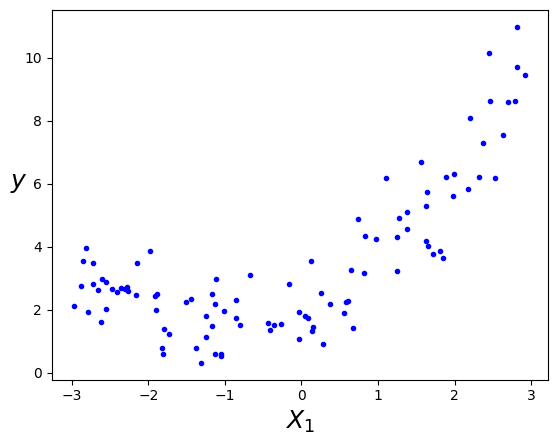

In [88]:
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.xlabel("$X_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)

plt.show()

In [89]:
X[0]

array([-2.65149833])

In [90]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]


array([-2.65149833,  7.03044338])

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.03118429]), array([[1.05027638, 0.51274763]]))

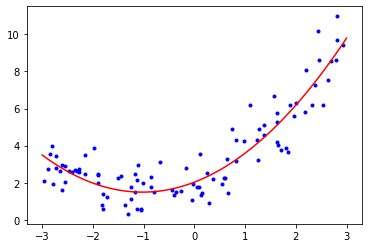

In [78]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new_predict = lin_reg.predict(X_new_poly)

plt.plot(X,y,"b.")
plt.plot(X_new,y_new_predict,"r-")
plt.show()

In [82]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

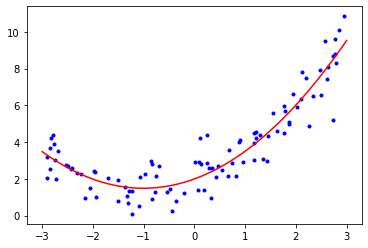

In [85]:
from sklearn.pipeline import Pipeline

test = Pipeline([("poly_features",PolynomialFeatures(degree=2,
                                                    include_bias=False)),
                ("lin_reg",LinearRegression()),
               ])

test.fit(X,y)

X_new = np.linspace(-3,3,100).reshape(100,1)
y_new_predict = test.predict(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_new_predict,"r-")
plt.show()

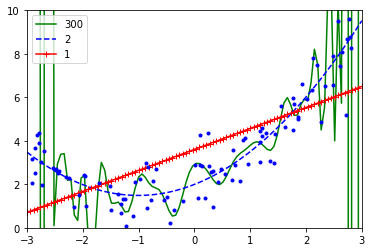

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_new = np.linspace(-3,3,100).reshape(100,1)


for style,degree_v in (("g-",300),("b--",2),("r-+",1)):
    poly_features = PolynomialFeatures(degree=degree_v,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([("poly_features",poly_features),
                                      ("std_scalar",std_scaler),
                                      ("lin_reg",lin_reg),
                                     ])

    polynomial_regression.fit(X,y)
    y_new_predict = polynomial_regression.predict(X_new)
    plt.plot(X_new,y_new_predict,style,label=str(degree_v))

plt.plot(X,y,"b.")
plt.legend(loc="upper left")
plt.axis([-3,3,0,10])
plt.show()


# Underfitting or overfitting

In [50]:
import numpy as np
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

(0.0, 80.0, 0.0, 3.0)

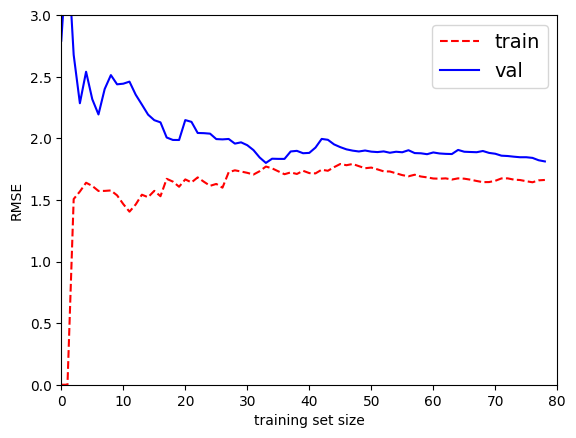

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)
    train_errors, val_errors = [],[]

    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))

    plt.plot(np.sqrt(train_errors), "r--",label="train")
    plt.plot(np.sqrt(val_errors), "b-",label="val")
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("training set size")
    plt.ylabel("RMSE")


model= LinearRegression()
plot_learning_curves(model,X,y)
plt.axis([0,80,0,3])



(0.0, 80.0, 0.0, 3.0)

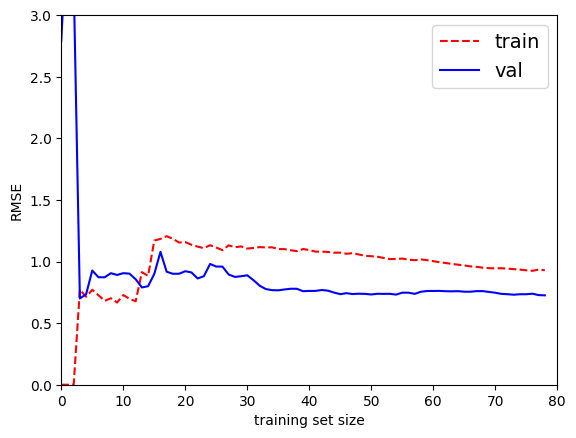

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


polynomial_regression = Pipeline([("poly_features",PolynomialFeatures(degree=2)),
                                  ("lin_reg",LinearRegression())
                                 ])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])




# Regularized models

In [37]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
#Create an array of the given shape and populate it with random samples 
#from a uniform distribution over [0, 1).

y = 1 + 0.5 * X + np.random.randn(m,1)/1.5

X_new = np.linspace(0,3,10).reshape(10,1)

y,y.ravel()

(array([[0.88658943],
        [2.63556968],
        [1.49264153],
        [0.95645193],
        [2.21112714],
        [1.08347425],
        [1.13214422],
        [1.34943209],
        [1.5387507 ],
        [2.13605726],
        [0.26354769],
        [2.70533012],
        [1.84823817],
        [1.12404617],
        [0.87159971],
        [2.50995889],
        [1.44736521],
        [1.08199403],
        [2.1962808 ],
        [0.62294794]]),
 array([0.88658943, 2.63556968, 1.49264153, 0.95645193, 2.21112714,
        1.08347425, 1.13214422, 1.34943209, 1.5387507 , 2.13605726,
        0.26354769, 2.70533012, 1.84823817, 1.12404617, 0.87159971,
        2.50995889, 1.44736521, 1.08199403, 2.1962808 , 0.62294794]))

In [33]:
# ridge 直接求解 

from sklearn.linear_model import Ridge
rigde_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
rigde_reg.fit(X,y)
rigde_reg.predict([[1.5],[2.0]])

array([[1.55071465],
       [1.73211649]])

In [34]:
from sklearn.linear_model import Ridge
rigde_reg = Ridge(alpha=1, solver="sag", random_state=42)
rigde_reg.fit(X,y)
rigde_reg.predict([[1.5],[2.0]])

array([[1.5507201 ],
       [1.73214345]])

In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(penalty="l2",max_iter=1000,tol=1e-3,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5],[2.0]])

array([1.47012588, 1.78034294])

In [41]:
import numpy as np
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

(0.0, 80.0, 0.0, 3.0)

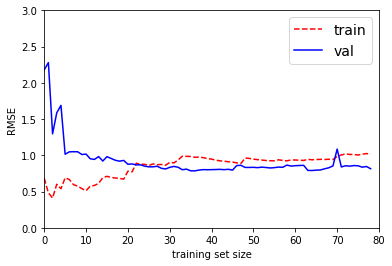

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler




polynomial_regression = Pipeline([("poly_features",PolynomialFeatures
                                   (degree=10,include_bias=False)),
                                  ("std_scaler",StandardScaler()),
                                  ("lin_reg",SGDRegressor(penalty="l2",max_iter=1000,
                                                          tol=1e-3,random_state=42))
                                 ])

plot_learning_curves(polynomial_regression,X,y.ravel())
plt.axis([0,80,0,3])


# beautiful free lunch

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html


fit_intercept参数用来指定模型是否要拟合截距项，如果数据已经中心化，可以设为False。默认值为True。

random_state用来指定随机种子，用来控制模型的随机性。如果给定特定值，重新跑模型的时候，可以得出同样的结果。

n_iter_no_change，每当超过n_iter_no_change参数的迭代次数损失函数没有显著变化时，训练停止。默认值为5。

max_iter用来指定神经网络的最大迭代次数，默认值为1000。

l1_ratio用于弹性网络模型(ElasticNet)，表示L1正则的比例。默认值为0.15。

alpha用来指定一个常数，用于在损失函数中乘以正则项。该值越高，正则程度越高。

eta0参数用来指定初始的学习率。

tol参数用于指定优化器的忍耐度。当损失函数的值的变化小于了忍耐度，便认为训练结束，从而停止训练。默认值为1e-4。

loss参数用于指定损失函数的形式。

loss = hinge，采用铰链损失函数（适用于分类任务）。
loss = log，采用对数损失函数（适用于分类任务）。
loss = modified_huber,采用调整huber损失函数（适用于分类任务）。
loss = perception，采用perception损失函数（适用于分类任务）。
loss = squared_error，采用平方损失函数（适用于回归任务）。（默认值）
loss = huber，采用huber损失函数（适用于回归任务）。
loss = epsilon_insensitive，采用经epsilon调整的铰链损失函数（适用于回归任务）。
loss = squared_epsilon_insensitive，采用经平方epsilon调整的铰链损失函数（适用于回归任务）。
penalty参数用于指定正则项的形式。

penalty = l1，表示使用L1正则项。
penalty = l2，表示使用L2正则项。（默认值）
penalty = elasticnet，表示使用弹性网络的正则项，它是L1正则项和L2正则项的融合。
learning_rate用来指定学习率的模式。

learning_rate= constant，即使用常数作为学习率。用eta0参数来设置其值。
learning_rate = optimal，eta = 1.0 / (alpha * (t + t0))。其中t是迭代的步数，t0是由Leon Bottou提出的启发式选择。（默认值）
learning_rate = invscaling，使用一种逐渐自动下降的学习率。在训练的第t步，学习率会变为eta0 / pow(t, power_t)。其中power_t可以手动设定，其默认值为0.5。
learning_rate = adaptive，使用自适应的学习率。每当n_iter_no_change次迭代，误差函数变化很小时，就会降低学习率。
power_t参数仅在learning_rate = invscaling时有效，其作用见learning_rate参数下invscaling取值时的说明。默认值为0.5。



In [56]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, 
                                                  random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])



X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


sgd_reg = SGDRegressor(max_iter=1,warm_start=True,penalty=None,
                     learning_rate="constant",eta0=0.0005,random_state=42)

train_errors, val_errors = [],[]

for epoch in range(500):
    sgd_reg.fit(X_trained_poly_scaled,y_train)
    y_train_predict = sgd_reg.predict(X_trained_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict,y_train))
    val_errors.append(mean_squared_error(y_val_predict,y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=8,
            )


plt.plot(np.sqrt(val_errors),"b-",label="Validation")
plt.plot(np.sqrt(train_errors),"r--",label="Training")
plt.legend(loc="upper left")
plt.xlabel("epoch")
plt.ylabel("RMSE")


    

NameError: name 'X_trained_poly_scaled' is not defined

In [57]:
# fit_transform(trainData)对部分数据先拟合fit，找到该part的整体指标，如均值、方差、最大值最小值等等
# （根据具体转换的目的），然后对该trainData进行转换transform，从而实现数据的标准化、归一化等等。

# 根据对之前部分trainData进行fit的整体指标，对剩余的数据（testData）使用同样的均值、方差、最大最小值
# 等指标进行转换transform(testData)，从而保证train、test处理方式相同。所以，一般都是这么用：

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit_tranform(X_train)
# sc.tranform(X_test)

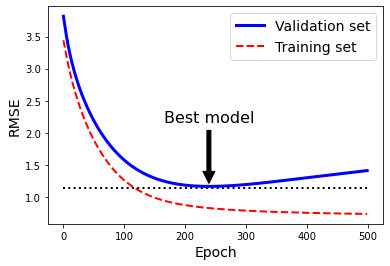

In [118]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, 
                                                  random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [120]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, warm_start=True))

# sigmoid function

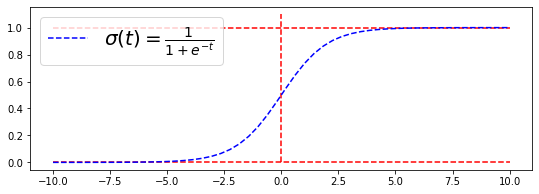

In [10]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10,10,50)
y = 1/(1+np.exp(-t))

plt.figure(figsize=(9,3))
plt.plot([-10,10],[0,0],"r--")
plt.plot([-10,10],[1,1],"r--")
plt.plot([0,0],[0,1.1],"r--")

plt.plot(t,y, "b--", label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.legend(loc="upper left",fontsize=20)
plt.show()

(-2.0, 2.0, -2.0, 2.0)

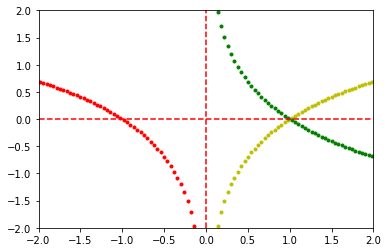

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

t = math.log(10)
t

x = np.linspace(-10,10,500)

plt.plot(x[x>0],np.log(x[x>0]),"y.")
plt.plot(x[x<0],np.log(-x[x<0]),"r.")
plt.plot(x[x>0],-np.log(x[x>0]),"g.")
plt.plot([-2,2],[0,0],"r--")
plt.plot([0,0],[-2,2],"r--")
plt.axis([-2,2,-2,2])

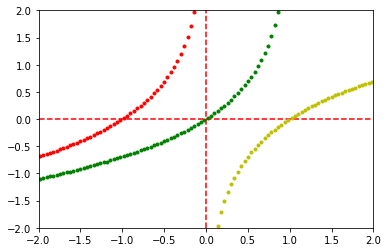

In [35]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10,10,500)

plt.plot([-2,2],[0,0],"r--")
plt.plot([0,0],[-2,2],"r--")
plt.axis([-2,2,-2,2])
plt.plot(x[x>0],np.log(x[x>0]),"y.")
plt.plot(x[x<0],-np.log(-x[x<0]),"r.")
plt.plot(x[1>x],-np.log(1-x[1>x]),"g.")


In [42]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [43]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

(0.0, 3.0, -0.02, 1.02)

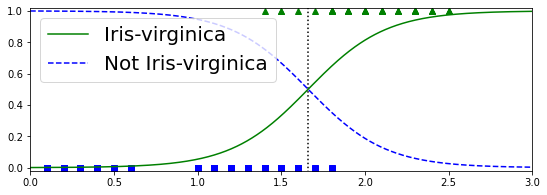

In [74]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:,1]>=0.5][0]
decision_boundary

plt.figure(figsize=(9,3))

plt.plot([decision_boundary,decision_boundary],[-1,2],"k:")
plt.plot(X[y==0],y[y==0],"bs")
plt.plot(X[y==1],y[y==1],"g^")


plt.plot(X_new,y_proba[:,1],"g-",label="Iris-virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-virginica")
plt.legend(loc="upper left",fontsize=20)
plt.axis([0,3,-0.02,1.02])



In [80]:
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="ovr",
                                 solver="liblinear",
                                C=10,random_state=42)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='ovr', random_state=42, solver='liblinear')